In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
import numpy as np
import os
import keras_metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import LSTM
from keras.layers import Reshape

import warnings
warnings.filterwarnings('ignore')

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), padding = 'same', input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third conolutional layer
classifier.add(Convolution2D(64, (3, 3), padding = 'same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dropout(rate = 0.5))

# Step 4 - Full connection
classifier.add(Reshape((4*4, 1024)))
classifier.add(LSTM(units = 50, return_sequences = True, dropout = 0.5))
classifier.add(LSTM(units = 20, return_sequences = False, dropout = 0.5))
classifier.add(Dense(output_dim = 7, activation = 'softmax'))

classifier.summary()

Z:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
__________

In [2]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

In [3]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   height_shift_range =  0.1,
                                   width_shift_range = 0.1,
                                   channel_shift_range = 10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('test/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4410 images belonging to 7 classes.
Found 1475 images belonging to 7 classes.


In [4]:
results = classifier.fit_generator(training_set,
                         samples_per_epoch = 4410,
                         nb_epoch = 100,
                         validation_data = test_set,
                         nb_val_samples = 1475)

Epoch 1/100
137/137 [==============================] - 951s 7s/step - loss: 1.8649 - acc: 0.2567 - precision: 0.1180 - recall: 0.0089 - val_loss: 1.6272 - val_acc: 0.3793 - val_precision: 0.6935 - val_recall: 0.0694
Epoch 2/100
137/137 [==============================] - 1188s 9s/step - loss: 1.5503 - acc: 0.3998 - precision: 0.6108 - recall: 0.1104 - val_loss: 1.2741 - val_acc: 0.5081 - val_precision: 0.7049 - val_recall: 0.2695
Epoch 3/100
137/137 [==============================] - 1874s 14s/step - loss: 1.3563 - acc: 0.4855 - precision: 0.6746 - recall: 0.2355 - val_loss: 1.2293 - val_acc: 0.5370 - val_precision: 0.6147 - val_recall: 0.4085
Epoch 4/100
137/137 [==============================] - 1872s 14s/step - loss: 1.2445 - acc: 0.5266 - precision: 0.6832 - recall: 0.3071 - val_loss: 1.0961 - val_acc: 0.5927 - val_precision: 0.6834 - val_recall: 0.4644
Epoch 5/100
137/137 [==============================] - 1876s 14s/step - loss: 1.1746 - acc: 0.5598 - precision: 0.7032 - recall: 0.

137/137 [==============================] - 1877s 14s/step - loss: 0.4306 - acc: 0.8392 - precision: 0.8600 - recall: 0.8182 - val_loss: 0.1679 - val_acc: 0.9450 - val_precision: 0.9510 - val_recall: 0.9362
Epoch 39/100
137/137 [==============================] - 1879s 14s/step - loss: 0.3983 - acc: 0.8553 - precision: 0.8745 - recall: 0.8375 - val_loss: 0.1820 - val_acc: 0.9404 - val_precision: 0.9470 - val_recall: 0.9316
Epoch 40/100
137/137 [==============================] - 1875s 14s/step - loss: 0.3821 - acc: 0.8623 - precision: 0.8797 - recall: 0.8441 - val_loss: 0.1985 - val_acc: 0.9296 - val_precision: 0.9368 - val_recall: 0.9241
Epoch 41/100
137/137 [==============================] - 1891s 14s/step - loss: 0.4169 - acc: 0.8497 - precision: 0.8711 - recall: 0.8280 - val_loss: 0.1589 - val_acc: 0.9485 - val_precision: 0.9534 - val_recall: 0.9417
Epoch 42/100
137/137 [==============================] - 1881s 14s/step - loss: 0.3842 - acc: 0.8657 - precision: 0.8847 - recall: 0.8467 

137/137 [==============================] - 1899s 14s/step - loss: 0.2003 - acc: 0.9306 - precision: 0.9377 - recall: 0.9251 - val_loss: 0.0625 - val_acc: 0.9802 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 76/100
137/137 [==============================] - 1894s 14s/step - loss: 0.2274 - acc: 0.9200 - precision: 0.9267 - recall: 0.9173 - val_loss: 0.0534 - val_acc: 0.9824 - val_precision: 0.9843 - val_recall: 0.9810
Epoch 77/100
137/137 [==============================] - 1894s 14s/step - loss: 0.2042 - acc: 0.9308 - precision: 0.9380 - recall: 0.9228 - val_loss: 0.0481 - val_acc: 0.9884 - val_precision: 0.9891 - val_recall: 0.9871
Epoch 78/100
137/137 [==============================] - 1884s 14s/step - loss: 0.2125 - acc: 0.9274 - precision: 0.9341 - recall: 0.9217 - val_loss: 0.0628 - val_acc: 0.9778 - val_precision: 0.9784 - val_recall: 0.9771
Epoch 79/100
137/137 [==============================] - 1891s 14s/step - loss: 0.2169 - acc: 0.9243 - precision: 0.9293 - recall: 0.9186 

In [5]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = classifier.predict_generator(test_set, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

In [6]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [7]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

             precision    recall  f1-score   support

      anger       0.28      0.28      0.28       350
    boredom       0.14      0.15      0.15       223
    disgust       0.08      0.08      0.08       130
       fear       0.12      0.11      0.12       187
  happiness       0.13      0.14      0.13       196
    neutral       0.15      0.14      0.14       218
    sadness       0.14      0.14      0.14       171

avg / total       0.17      0.17      0.17      1475



Confusion matrix, without normalization
[[99 55 32 36 40 49 39]
 [47 34 14 26 39 32 31]
 [24 25 10 16 19 19 17]
 [45 36 20 21 20 24 21]
 [47 34 24 24 27 22 18]
 [49 35 19 30 35 30 20]
 [37 21 14 20 26 29 24]]


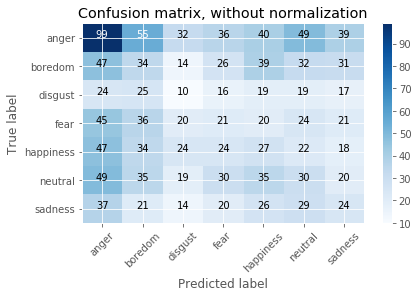

Normalized confusion matrix
[[28.2857 15.7143  9.1429 10.2857 11.4286 14.     11.1429]
 [21.0762 15.2466  6.278  11.6592 17.4888 14.3498 13.9013]
 [18.4615 19.2308  7.6923 12.3077 14.6154 14.6154 13.0769]
 [24.0642 19.2513 10.6952 11.2299 10.6952 12.8342 11.2299]
 [23.9796 17.3469 12.2449 12.2449 13.7755 11.2245  9.1837]
 [22.4771 16.055   8.7156 13.7615 16.055  13.7615  9.1743]
 [21.6374 12.2807  8.1871 11.6959 15.2047 16.9591 14.0351]]


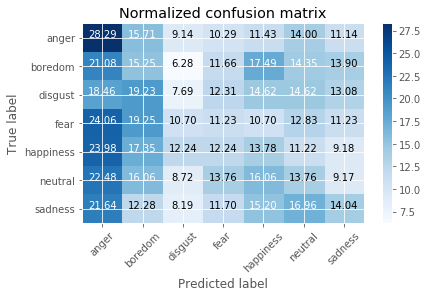

In [11]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels,
                      title='Confusion matrix, without normalization')
plt.savefig("non_normalized_confusion_matrix_cnn_lstm.png")
plt.show()
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig("normalized_confusion_matrix_cnn_lstm.png")
plt.show()

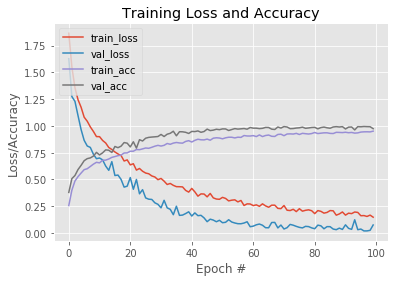

In [12]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0, N), results.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), results.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), results.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), results.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig("plot_cnn_lstm.png")